# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

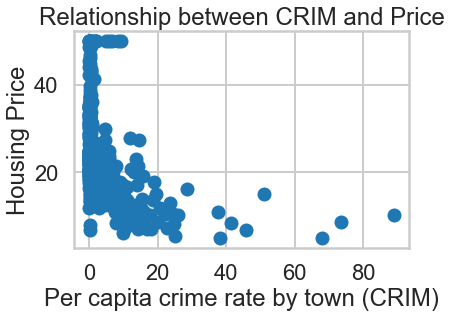

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
_ = plt.title("Relationship between CRIM and Price")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

## Per-Capita Crime Rate vs. Housing Price

The relationship between crime rate and price seem to have a non-linear, exponentially decaying relationship. The housing prices vary widely if the per capita crime rate per town is near zero. As the per capita crime rate increases, the housing prices decrease below half the city average of $22,000. While 75\% of the homes listed are in Boston towns that experience between 0 and 3.68\% crime rate per capita, there are some houses listed in Boston that experience crime rates of up to 89\% per capita.

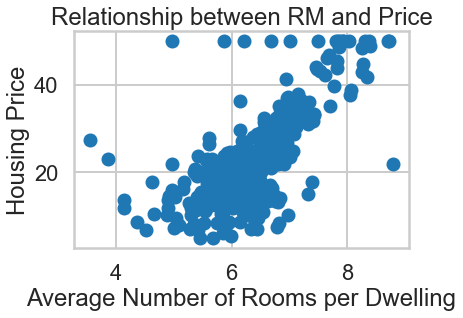

In [13]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average Number of Rooms per Dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

In [14]:
below_four_rooms = bos.loc[bos.RM < 4, :]
below_four_rooms_max = min(below_four_rooms.PRICE)
print(f'Number of Apartments With Less than Four Rooms: {len(below_four_rooms)}')

less_expensive_than_four_rooms = bos.loc[(bos.PRICE < below_four_rooms_max) & (bos.RM > 4), :]
print(f'Number of Apartments With More than Four Rooms that are Less Expensive: {len(less_expensive_than_four_rooms)}')


Number of Apartments With Less than Four Rooms: 2
Number of Apartments With More than Four Rooms that are Less Expensive: 316


#### Number of Rooms per Dwelling vs. Housing Price

The number of rooms per dwelling has a strong, positive, linear correlation to the Boston housing prices. As the number of rooms per dwelling increases, the Boston housing prices tend to increase. What's interesting here is that there are 2 rooms in the data listed with less than 4 rooms and there are 316 listings with more than 4 rooms that are cheaper to buy than the smallest size dwellings in Boston.

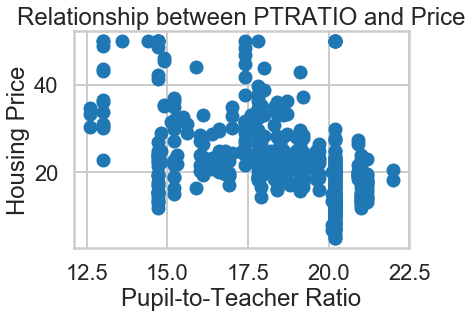

In [15]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
_ = plt.scatter(bos.PTRATIO, bos.PRICE)
_ = plt.xlabel("Pupil-to-Teacher Ratio")
_ = plt.ylabel("Housing Price")
_ = plt.title("Relationship between PTRATIO and Price")
plt.show()

#### Pupil-to-Teacher Ratio vs. Housing Price

The pupil-to-teacher ratio doesn't seem to have a strong relationship to Boston housing prices. This suggests that class size is independent to where a house is located in Boston. A small class size does not necessarily mean that the family living in the area is paying more to live there for the personalized education.

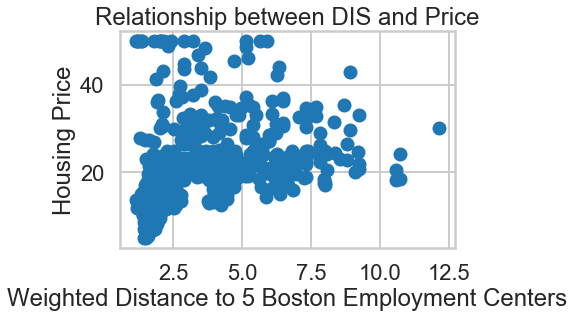

In [16]:
# your turn: create some other scatter plots
_ = plt.scatter(bos.DIS, bos.PRICE)
_ = plt.xlabel("Weighted Distance to 5 Boston Employment Centers")
_ = plt.ylabel("Housing Price")
_ = plt.title("Relationship between DIS and Price")
plt.show()

#### Distance from Nearby Employment Offices vs. Housing Price

The weighted distance from a dwelling to the nearest 5 employment centers and the housing price seems to have a non-linear, logistic relationship. This means that most of the housing prices, regardless of distance from the dwelling, tend to be priced close to the median of $21.2 thousand dollars. What's interesting about this trend is that the <i>closer</i> you get to the centers of employment, the cheaper the housing prices go. There are exceptions to this case, but this trend holds for the most part.

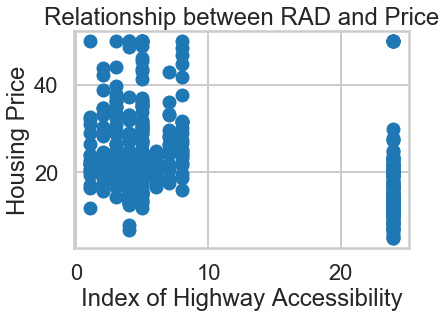

In [17]:
_ = plt.scatter(bos.RAD, bos.PRICE)
_ = plt.xlabel("Index of Highway Accessibility")
_ = plt.ylabel("Housing Price")
_ = plt.title("Relationship between RAD and Price")
plt.show()

#### Highway Accessibility vs. Housing Price

Highway accessibility doesn't seem to be a key factor in deciding Boston housing prices. The non-relationship suggests that how much a house is priced doesn't depend on how close the house is to a highway.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

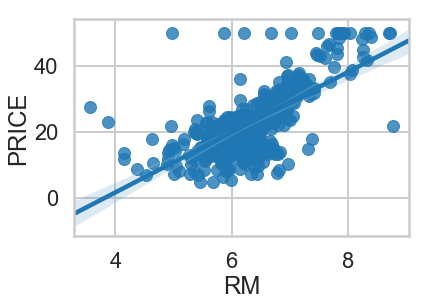

In [18]:
_ = sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


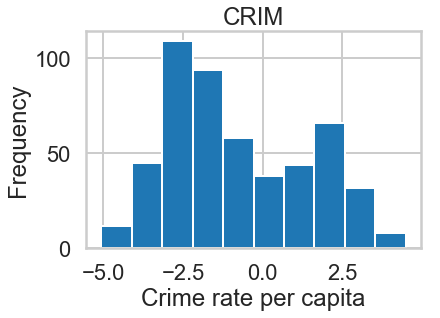

In [19]:
_ = plt.hist(np.log(bos.CRIM))
_ = plt.title("CRIM")
_ = plt.xlabel("Crime rate per capita")
_ = plt.ylabel("Frequency")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

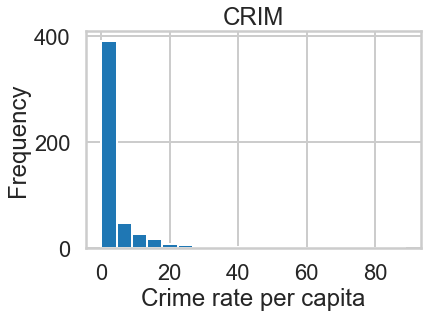

In [20]:
_ = plt.hist(bos.CRIM, bins=20)
_ = plt.title("CRIM")
_ = plt.xlabel("Crime rate per capita")
_ = plt.ylabel("Frequency")
plt.show()

In [21]:
lowest = min(bos.CRIM)
highest = max(bos.CRIM)
low50 = np.percentile(bos.CRIM, [0, 50])

print(f'50% of the dwellings have a crime rate below: {low50[1]}')
print(f'Lowest crime rate per capita is: {lowest}')
print(f'Highest crime rate per capita is: {highest}')

50% of the dwellings have a crime rate below: 0.25651
Lowest crime rate per capita is: 0.00632
Highest crime rate per capita is: 88.9762


Taking the logarithm of the Crime Rate per Capita column condenses the data to a more even scale. We do this transformation to represent the data better than if we were to represent it on a linear scale. The lowest crime rate per capita is 0.00632 and the highest is 88.9762. Beyond that, 50% of the data exists below a crime rate per capita value of 0.25651. Since the range of values varies so much and most of the data exists within a small subset of the total range, the histogram with untransformed data loses much of its resolution since 50% of the data is on a magnitude of 100x less than the maximum value. 

Taking the logarithm allows us to represent the data more evenly since the logarithm measures data in terms of its exponent with base 10 instead of its absolute value. For example, the minimum of .00632 would be represented by the value x where 

$10^x = 0.00632$ 

$x = -2.1993$

and the maximum of 88.9762 would be represented by the value y where

$10^y = 88.9762$

$y = 1.9493$

So with this transformation, instead of having our minimum and maximum values be on a 10000x order of magnitude range, their points are condensed between -2 and 2. This transformation changes our interpretation of the data. With untransformed data, the crime rate per capita seems to be heavily right skewed. By taking a logarithmic transformation of the crime rate data, we can see that crime rate in Boston expresses a bimodal distribution centered around -0.25 and 0.25, values whose absolute crime rate is 0.56 and 1.78, respectively.

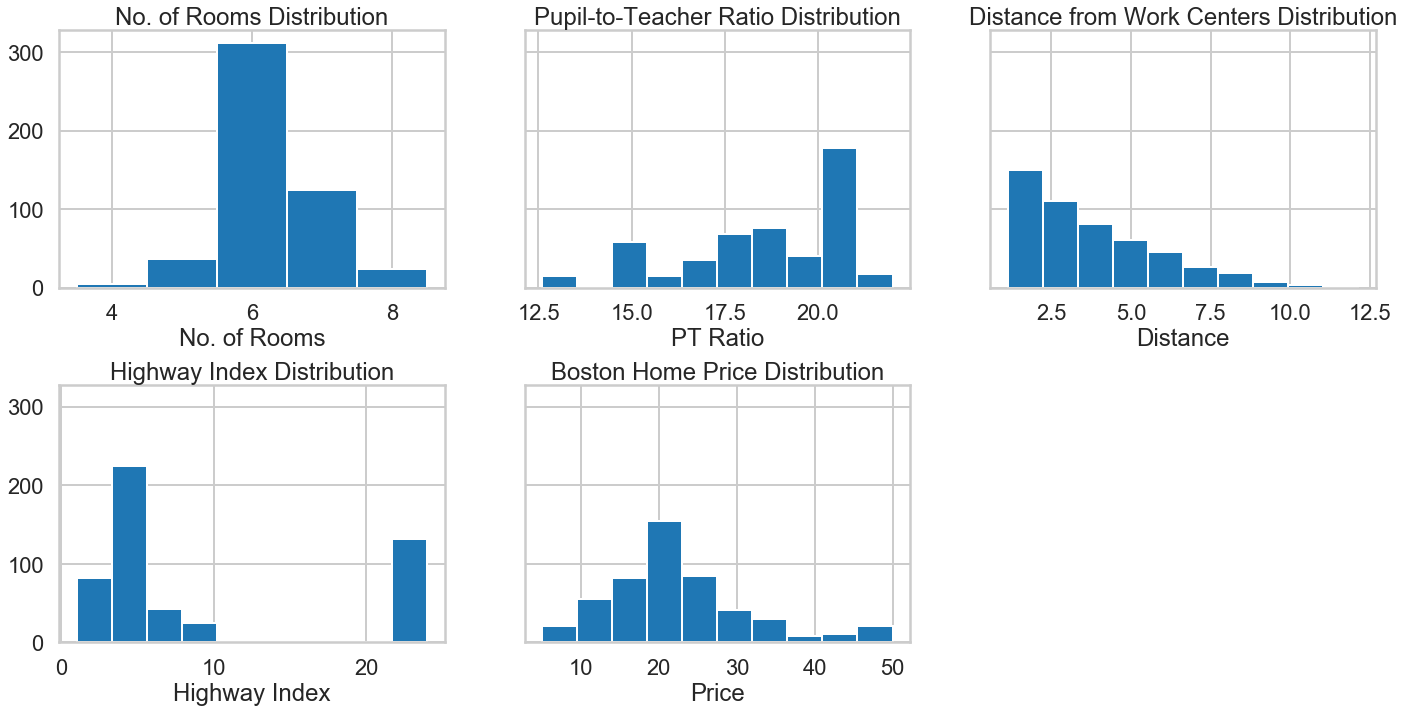

In [66]:
fig, axs = plt.subplots(2, 3, figsize=(20,10), sharey=True)

# Distribution for Number of Rooms
bins = [x-0.5 for x in range(4, 10)]
_ = axs[0,0].hist(bos.RM, bins=bins)
_ = axs[0,0].set_title("No. of Rooms Distribution")
_ = axs[0,0].set_xlabel("No. of Rooms")


# Distribution for PTRatio
_ = axs[0,1].hist(bos.PTRATIO, bins=10)
_ = axs[0,1].set_title("Pupil-to-Teacher Ratio Distribution")
_ = axs[0,1].set_xlabel("PT Ratio")

# Distribution for DIS
_ = axs[0,2].hist(bos.DIS, bins=10)
_ = axs[0,2].set_title("Distance from Work Centers Distribution")
_ = axs[0,2].set_xlabel("Distance")

# Distribution for RAD
_ = axs[1,0].hist(bos.RAD, bins=10)
_ = axs[1,0].set_title("Highway Index Distribution")
_ = axs[1,0].set_xlabel("Highway Index")

# Distribution for PRICE
_ = axs[1,1].hist(bos.PRICE, bins=10)
_ = axs[1,1].set_title("Boston Home Price Distribution")
_ = axs[1,1].set_xlabel("Price")

_ = axs[1,2].axis('off')

_ = plt.tight_layout()

These histograms give us an idea of what the typical home in Boston is like. Most homes in Boston are priced around the \\$15-25k range with housing prices going upwards to \\$50k. Most houses in Boston have 6 rooms and are closely located to business centers and the freeway. There are more than 100 houses in Boston that are located twice as far from the freeway as the rest of the Boston houses. Most classes in school accomodate around 18 to 21 children. 

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [23]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 11 Aug 2019   Prob (F-statistic):           2.49e-74
Time:                        11:32:51   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

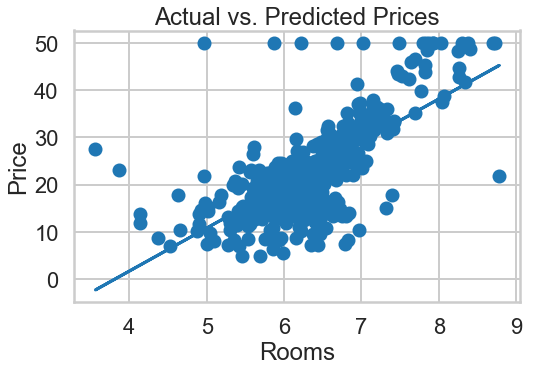

In [51]:
_ = plt.figure(figsize=(8,5))
_ = plt.scatter(bos.RM, bos['PRICE'])
_ = plt.plot(bos.RM, bos.pred)
_ = plt.xlabel('Rooms')
_ = plt.ylabel('Price')
_ = plt.title('Actual vs. Predicted Prices')
plt.show()

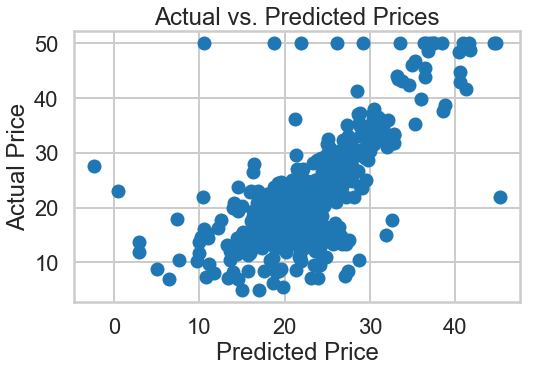

In [46]:
_ = plt.figure(figsize=(8,5))
_ = plt.scatter(m.fittedvalues, bos['PRICE'])
_ = plt.xlabel('Predicted Price')
_ = plt.ylabel('Actual Price')
_ = plt.title('Actual vs. Predicted Prices')
plt.show()

The line of best fit from the OLS model seems to follow the actual data points fairly well. The data shows a strong positive correlation between the number of rooms and housing price and the OLS linear regression model fits this relationship. 

The predicted values from the OLS model seem to split the data evenly above and below the predicted price line which makes sense. The residuals, on average, should equal zero. The data balancing out between the top and bottom halves of the line minimizes the sum of the residuals around the line of best fit.

### Fitting Linear Regression using `sklearn`


In [26]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [27]:
_ = lm.fit(X, bos['PRICE'])
print(f'Estimated Coefficients: {lm.coef_}')
print(f'Estimated Intercept: {lm.intercept_}')

Estimated Coefficients: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Estimated Intercept: 36.45948838509015


Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [28]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


#### Exercise 1
I would not recommend having an intercept term for this model since a house with zero rooms should not be predicted with a listed price.

#### Exercise 2
To answer whether normality itself is a satisfactory condition for the two assumptions that residuals are independently and identically distributed, it would be a good idea to define what IID means. A quick Google search shows that the definition of IID is that the data points must be independent from one another and have constant variance across all dimensions. To test if IID assumes normality, let's look at an example. If we were to define X as the random number of red balls that we get from picking 10 balls out of a bag of 8 red balls and 2 green balls with replacement, then we can say that trials for X are independent (since we're picking balls with replacement) and have constant variance (since the number of balls in the bag doesn't change). However, we should expect to pick more red balls than green balls on each trial over the course of many trials since there are 8 red balls in the bag and only 2 green balls. Our distribution is left skewed around 8 balls instead of the center of 5 balls. Therefore, we can't say that normally distributed data implies that the data is IID.

#### Exercise 3
<b>False</b> To use linear regression, the <i>residuals</i> should be normally distributed, not the ouput Y. If the residuals aren't normally distributed, then the sum of residuals around the line of best fit grows further away from zero. For example, if the residuals are right skewed (a greater number of high Y values for corresponding values of X), then the predicted point for the Linear Regression will tend upwards to where more data points lie than toward the center. As a result, this skews the line of best fit further away from where residuals balance over the entire spectrum of X.  The normal distribution of residuals ensures that the sum error around the linear regression is balanced.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [29]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [30]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [31]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [32]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

<b>Exercise 1</b>

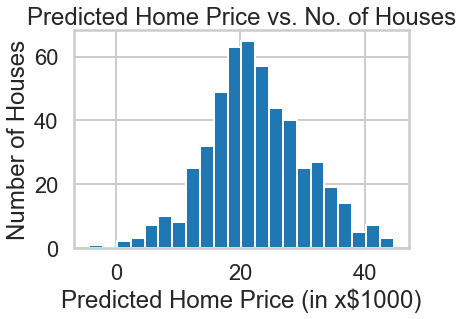

In [33]:
y_pred = lm.predict(X)
bins = int(np.sqrt(len(y_pred)))
_ = plt.hist(y_pred, bins=bins)
_ = plt.ylabel('Number of Houses')
_ = plt.xlabel('Predicted Home Price (in x$1000)')
_ = plt.title('Predicted Home Price vs. No. of Houses')
plt.show()

In [83]:
inner_range = np.percentile(y_pred, [2.5, 97.5])
num_low = y_pred[y_pred < inner_range[0]]
num_high = y_pred[y_pred > inner_range[1]]
print(f'Average Home Price: {np.mean(y_pred):.2f}')
print(f'Number of predictions : {len(y_pred)}')
print(f'Number of low outliers : {len(num_low)}')
print(f'Number of high outliers : {len(num_high)}')
print(f'Lowest value outlier : {min(num_low):.2f}')

Average Home Price: 22.53
Number of predictions : 506
Number of low outliers : 13
Number of high outliers : 13
Lowest value outlier : -1.00


Just looking at the histogram, we can see that most predicted housing prices in Boston range from \\$15-25k. The distribution of these prices is approximately normal which implies that the housing prices in Boston are roughly centered around the average $22.5k. In addition, for the 506 predicted data points for our housing market, 13 of the prices are considered low outliers and 13 of the prices are considered high outliers. The lowest value outliers for our OLS model yielded a potential home value of -\\$1k which doesn't make much practical sense. The OLS model needs to be adjusted so that the predicted lowest price home doesn't dip below the actual lowest price home in our dataset.

---

<b>Exercise 2</b>

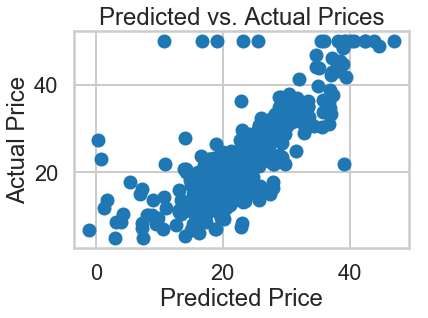

In [69]:
_ = plt.scatter(y_pred, bos['PRICE'])
_ = plt.xlabel('Predicted Price')
_ = plt.ylabel('Actual Price')
_ = plt.title('Predicted vs. Actual Prices')
plt.show()

For the extreme ranges of housing prices, the OLS model had a harder time predicting the actual values. There are 5 points where the OLS predicted values of around the \\$20k range where the actual housing prices should have been doubled. In addition, the lower range of housing prices aren't very well predicted either. The OLS model found some of the housing prices to be around \\$1k when the actual price was around \\$10k. So for this example, having a y-intercept adjusted to the lowest home prices is ideal since housing prices should never dip below that threshold.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [36]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [37]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837065056


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [38]:
from sklearn.linear_model import LinearRegression
X = np.array([bos.PTRATIO]).T
y = np.array([bos.PRICE]).T

reg = LinearRegression()
reg.fit(X,y)
print(f'Estimated Coefficient: {reg.coef_}')
print(f'Estimated Intercept: {reg.intercept_}')

Estimated Coefficient: [[-2.1571753]]
Estimated Intercept: [62.34462747]


Fitting an OLS linear model on the pupil-to-teacher ratio against Boston Housing Prices yields an intercept of 62.3 and a coefficient of -2.16. The intercept suggests that at very low class sizes, a potential home buyer can expect the price of their house to go for around \\$62.3k. The coefficient implies that for each additional student increase for the pupil-to-teacher ratio, the price of a house decreases by approximately -\\$2.16k.

In [39]:
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print(f'Estimated r2: {r2}')

Estimated r2: 0.7406426641094095


The $R^2$ value of 0.74 suggests that the pupil-to-teacher ratio is a fairly strong predictor for Boston home prices. The high $R^2$ value lets us know that the points for pupil-to-teacher ratio mapped against the Boston home prices are fairly close to the model's line of best fit.

In [40]:
import scipy.stats as stats
N = len(bos.PTRATIO)
K = 1
F = (r2**2 / (1-r2**2) ) * ( (N-K-1) / K )
p_value = stats.f.cdf(F, (N-K-1), K)
print(f'Estimated F Statistic: {F}')
print(f'Estimated P Value: {1-p_value}')

Estimated F Statistic: 612.4065500408198
Estimated P Value: 0.032217089928490816


The F-test is used to evaluate the Null Hypothesis that all coefficients in a linear regression are equal to zero. The Alternative Hypothesis is that at least one of the coefficients is non-zero. Setting up our Null Hypothesis test so that we reject the null in favor of the alternative at $\alpha=0.05$, we can compute the F statistic for the relationship between pupil-to-teacher ratio and housing price and determine if the two variables are linearly related.

Using the formal definition to find the F statistic and using the ```stats``` library to find its corresponding p-value, we find that the F statistic of 612.4 corresponds to a fairly low P value of 0.0322. This suggests that as the value of F increases, the estimated p-value decreases. This makes logical sense because the F statistic is proportional to $ESS / RSS$. The F statistic increases with a higher value for Explained Sum of Squares and with a lower value of Residual Sum of Squares which characterizes the distance between points to the line of best fit. Since we set up our Null Hypothesis test so that $\alpha=0.05$, then this low p-value suggests that we should reject the Null Hypothesis in favor of the alternative that their is a linear relationship between pupil-to-teacher ratio and housing prices.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [85]:
X = bos.loc[:, ['CRIM', 'RM', 'PTRATIO']]
y = np.array([bos.PRICE]).T

reg = LinearRegression()
reg.fit(X,y)
y_pred = reg.predict(X)
r2 = r2_score(y, y_pred)

print(f'Estimated Coefficient: {reg.coef_}')
print(f'Estimated Intercept: {reg.intercept_}\n')

N = len(bos.CRIM)
K = 3
F = (r2**2 / (1-r2**2) ) * ( (N-K-1) / K )
p_value = stats.f.cdf(F, (N-K-1), K)

print(f'Estimated F-Statistic: {F}')
print(f'Estimated P Value: {1-p_value}')

Estimated Coefficient: [[-0.20496083  7.3804111  -1.0695461 ]]
Estimated Intercept: [-3.37070434]

Estimated F-Statistic: 91.3928410231978
Estimated P Value: 0.0015684918021114935


As we stated earlier by relating the pupil-to-teacher ratio to the Boston Housing Prices, the F-statistic will give us information to suggest if there is a non-zero coefficient in the linear model between crime rate, number of rooms, and parent-to-teacher ratio and Boston housing prices. With an $\alpha=0.05$, we will reject the Null Hypothesis in favor of the alternative that there is a non-zero coefficient for at least one of the features and its linear relationship between it and the Boston Housing Price.

Taking the F-statistic and p-value in the same way as last time, we find that the F-statistic of 91.39 yields a p-value of 0.0015. Since the p-value is less than our $\alpha$ value of 0.05, we will reject the null in favor of the alternative that at least one of the variables is linearly related to the Boston housing prices. The F-test doesn't tell us which feature in the set is linearly related to the Boston housing prices. From our previous explorations into the data, we can recall that the number of rooms and parent-to-teacher ratio are fairly linearly related to Boston housing prices.

In [42]:
r2 = r2_score(y, y_pred)
print(f'Estimated r2: {r2}')

Estimated r2: 0.5943412940723471


The $R^2$ score for this model is 0.59. The OLS model with three different variables performed worse at predicting the housing prices using just the pupil-to-teacher ratio. This happens because the relationship between crime rate and housing prices aren't linearly related. Crime rate decays exponentially at the lower priced housing market and remains fairly consistent as prices increase beyond $15k. 

The intercept term suggests the price of a home given that all of these features are equal to zero. So if there was a theoretical property with zero rooms, no crime, and zero parent-to-teacher ratio, then our model would suggest that the baseline property would go for -\\$3.37k. 

The coefficients for each feature correspond to the increase or decrease of that feature with a \\$1k raise in housing price given that these features are independent of one another. With a \\$1k raise in housing price, the expected crime rate goes down by -0.20 points in crime rate per capita, the expected number of rooms goes up by 7.38 rooms and the pupil-to-teacher ratio decreases by -1.07.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>
